In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12, 12)

##### Exploratory Data Analysis 

In [2]:
train = pd.read_csv("train.csv", delimiter=";")
train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458258,-0.579012,2.886009,-0.075516,1.674060,-2.431912,0.534850,-0.846473,2
1,1.626615,-0.028332,-1.443184,-1.007447,-0.989093,1.202627,-0.038211,-1.298616,0
2,1.721356,-0.137676,-1.322593,-1.333187,-0.723713,0.843285,-0.588495,0.066682,0
3,-0.715103,3.265915,-0.791030,-2.967881,2.497628,-0.277387,-0.551611,0.668354,2
4,2.944098,0.197871,-2.257025,1.032789,-4.104693,4.716115,-0.380813,-1.393825,0


In [3]:
test = pd.read_csv("test.csv", delimiter=";")
test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.052199,2.514513,-0.197672,1.978709,-2.014691,3.852886,-2.126254,0.794624
1,-0.828073,0.085895,1.712522,0.078828,1.280057,-1.462486,2.469702,0.816540
2,-1.086411,-0.142109,0.013089,-0.115223,0.948242,-1.121574,0.517415,0.250672
3,0.093129,2.868934,-0.075120,0.650641,-0.886186,2.917352,-0.722935,0.063071
4,0.046167,2.822612,0.433869,-3.054525,2.537684,-0.717312,0.862266,-0.525491


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   feature7  2100 non-null   float64
 7   feature8  2100 non-null   float64
 8   target    2100 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 147.8 KB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,2100.0,-0.318846,1.575061,-5.031501,-1.406249,-0.431219,0.773896,5.388387
feature2,2100.0,0.005348,1.605428,-6.004578,-1.119150,-0.162577,1.127450,7.663112
feature3,2100.0,-0.327567,1.479745,-5.470794,-1.368208,-0.532158,0.573801,4.869581
feature4,2100.0,0.024042,1.548154,-5.296172,-1.083716,0.152545,1.173172,4.318758
feature5,2100.0,0.085851,1.788543,-5.719499,-1.136441,0.102788,1.507492,6.033273
feature6,2100.0,-0.065000,2.124337,-4.910575,-1.613267,-0.431328,1.162813,7.053420
feature7,2100.0,-0.025603,1.015619,-3.850552,-0.701442,-0.007598,0.665932,4.400697
feature8,2100.0,-0.004437,1.003342,-3.541608,-0.659096,-0.019797,0.667530,3.579874
target,2100.0,0.985238,0.815098,0.000000,0.000000,1.000000,2.000000,2.000000


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  900 non-null    float64
 1   feature2  900 non-null    float64
 2   feature3  900 non-null    float64
 3   feature4  900 non-null    float64
 4   feature5  900 non-null    float64
 5   feature6  900 non-null    float64
 6   feature7  900 non-null    float64
 7   feature8  900 non-null    float64
dtypes: float64(8)
memory usage: 56.4 KB


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,900.0,-0.385276,1.547693,-5.787221,-1.434168,-0.500617,0.549975,3.918199
feature2,900.0,0.062003,1.555657,-3.674771,-1.077770,-0.017847,1.134111,5.795235
feature3,900.0,-0.272598,1.440845,-4.629337,-1.335606,-0.459326,0.603355,5.640333
feature4,900.0,-0.073202,1.501186,-5.053498,-1.086698,-0.000771,1.048799,4.438875
feature5,900.0,0.238610,1.791003,-5.370165,-0.909621,0.352712,1.663170,5.742810
feature6,900.0,-0.191850,2.106396,-5.061540,-1.709935,-0.690707,0.944483,6.634086
feature7,900.0,-0.031561,0.985244,-3.225231,-0.704612,-0.025951,0.608235,3.123964
feature8,900.0,-0.001633,1.026729,-3.519808,-0.701739,-0.021752,0.669796,3.284115


We find that we have no missing values in any of the both datasets. Furthermore, it appears to be that the distribution of values are normally distributed, without any skewness. At least, that is our first hypothesis. Our main goal is to perform a Random Forest Classifier and find the best hyperparameters to obtain an accuracy score above 90% on the validation data. In the aftermath, we can proceed with making our final predictions on the training dataset.

In [8]:
def correlation(dataframe=train):
    methods = ["pearson", "spearman", "kendall"]
    palette = ["magma", "viridis", "cubehelix"]
    for i in range(3):
        plt.style.use("ggplot")
        plt.figure(figsize=(12, 8))
        sns.heatmap(dataframe.corr(method=methods[i]), vmax=.8, square=True, annot=True, linewidths=.5, cmap=palette[i])
        plt.title(methods[i] + " correlation")
        plt.show()

In [9]:
def boxplots(dataframe=train, y=train["target"]):
    for feature in dataframe.columns[:-1]:
        plt.figure(figsize=(9, 6))
        sns.boxplot(x=y,y=feature, data=dataframe)
        plt.grid(True)
        plt.show()

In [10]:
def distplots(dataframe=train):
    colors = ["dimgrey", "lightcoral", "tan", "lightsteelblue", "teal", "indigo", "navy"]
    for feature in dataframe.columns[:-1]:
        plt.figure(figsize=(9, 6))
        sns.distplot(dataframe[feature], color= np.random.choice(colors))
        plt.show()

In [11]:
def violinplots(dataframe=train):
    colors = ["dimgrey", "lightcoral", "tan", "lightsteelblue", "teal", "indigo", "navy"]
    for feature in dataframe.columns[:-1]:
        plt.figure(figsize=(9, 6))
        sns.violinplot(dataframe[feature], color= np.random.choice(colors),
                      orient="v")

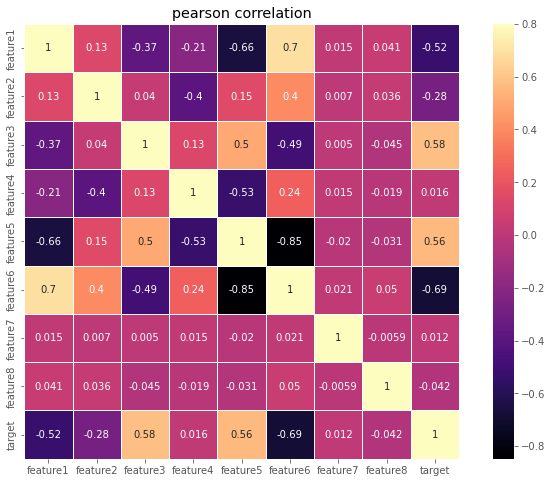

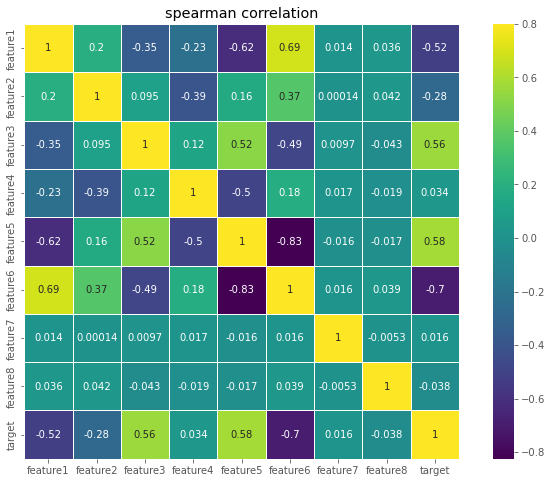

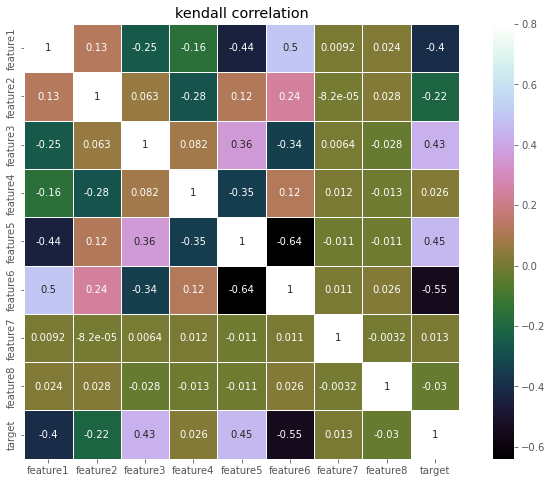

In [12]:
correlation(train)

I want to draw the attention to the fact that all features except "feature4", "feature7" and "feature8" are terrifically correlated to the target variable. Hence, we might expect our model to not be polluted with noise. 

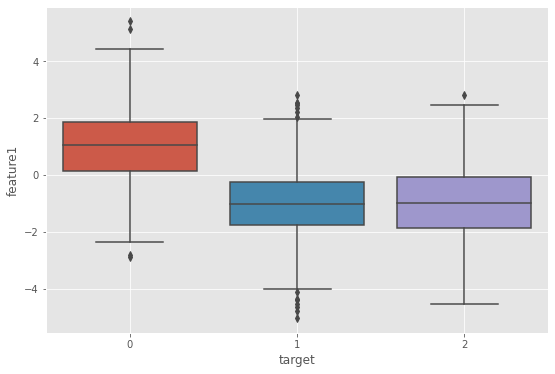

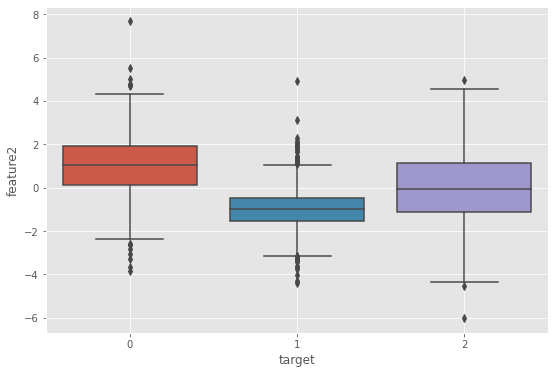

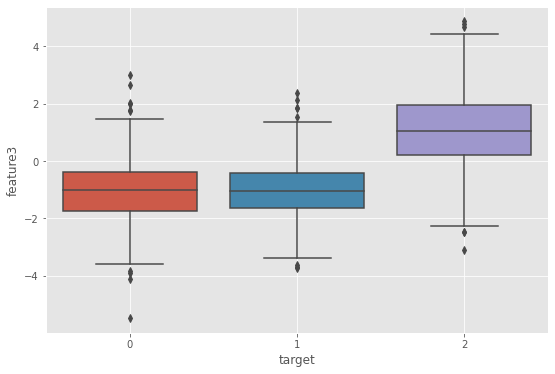

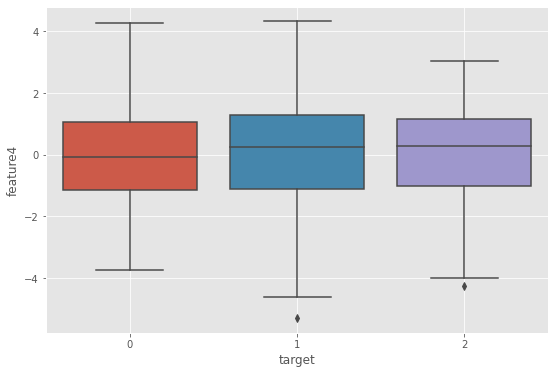

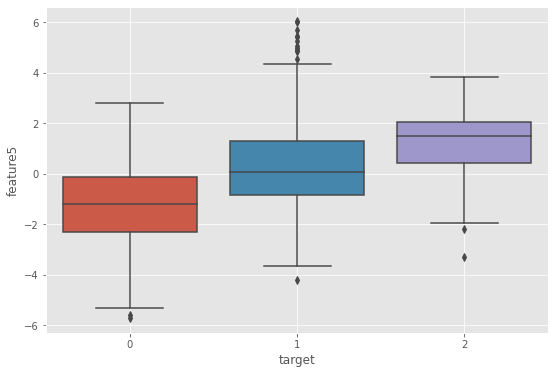

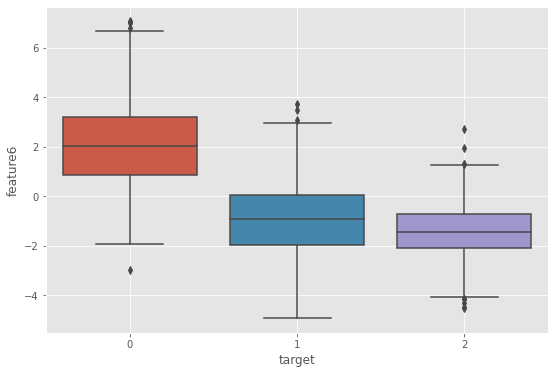

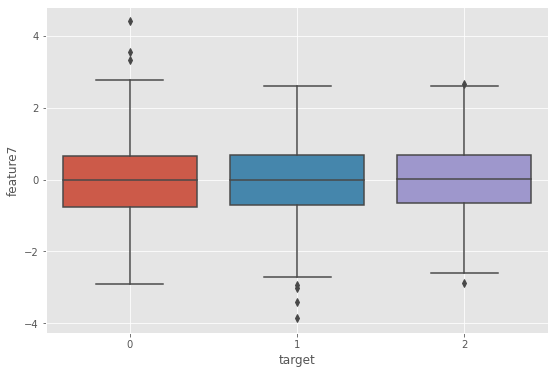

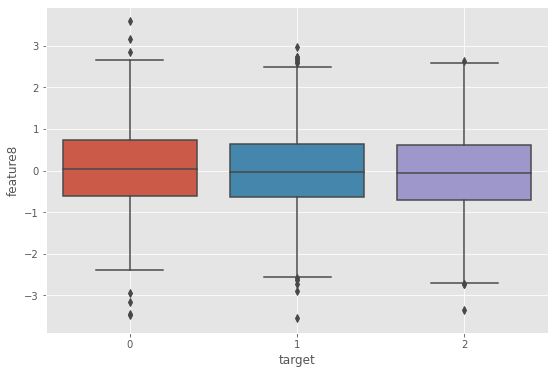

In [13]:
boxplots(train)

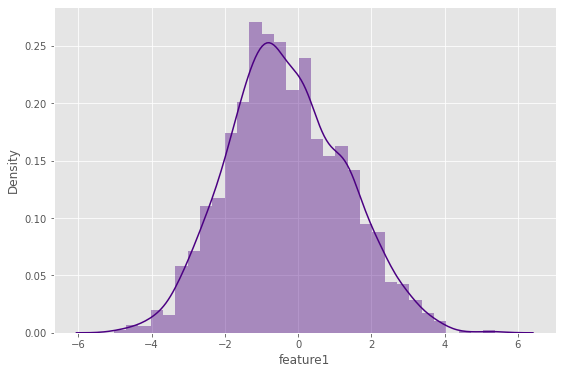

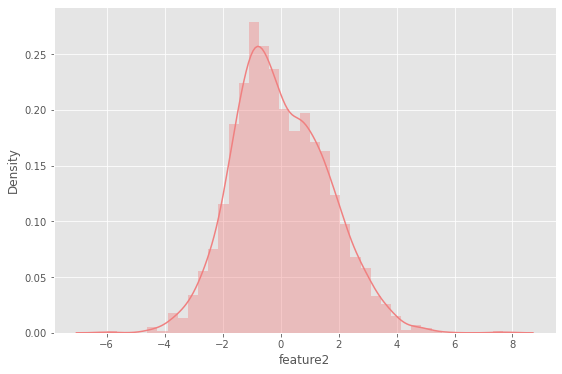

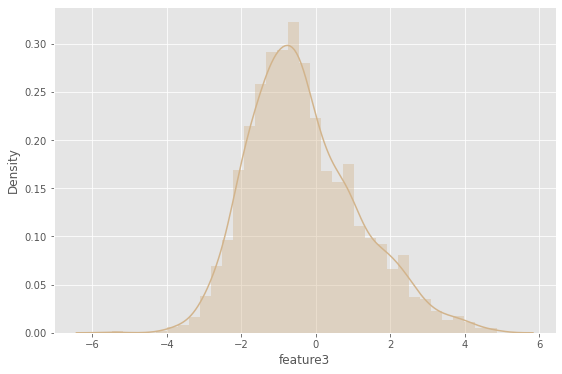

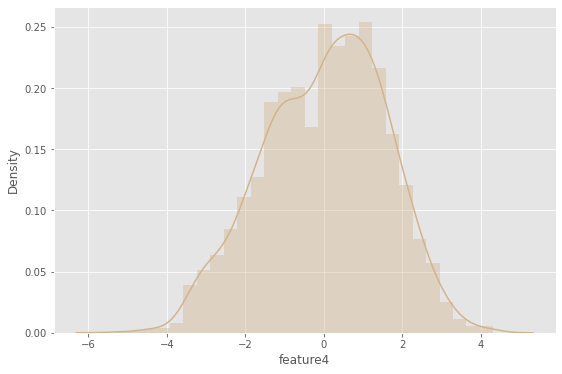

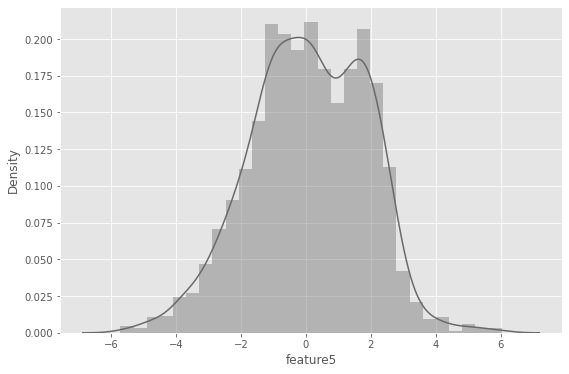

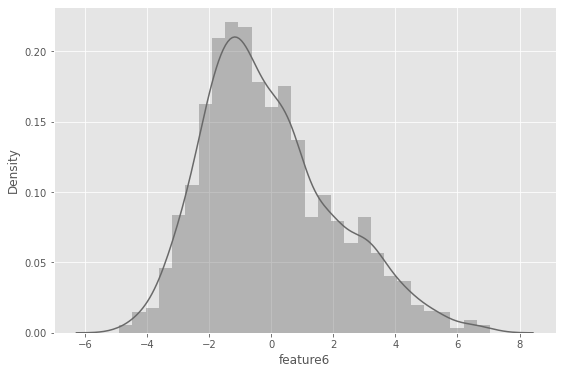

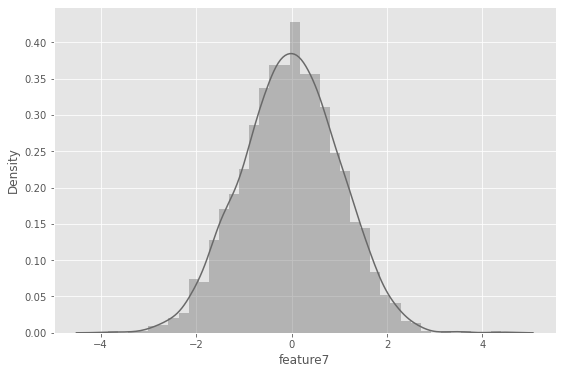

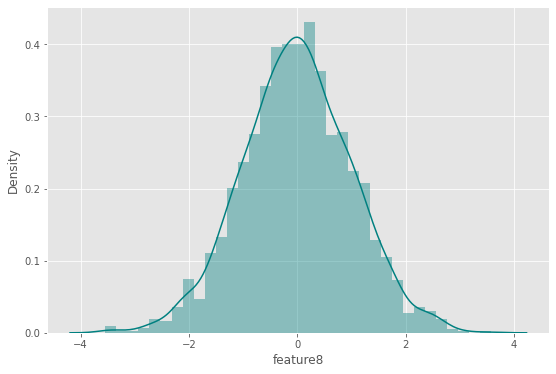

In [14]:
distplots(train)

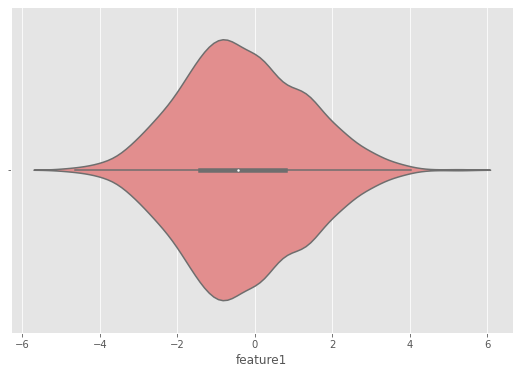

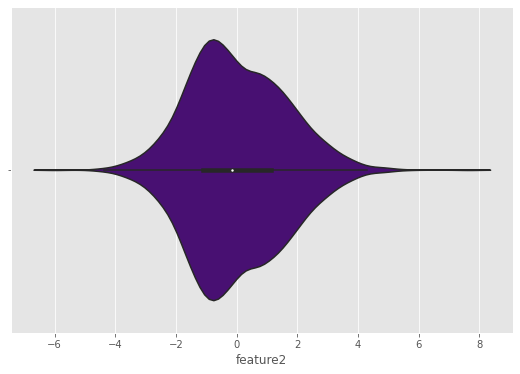

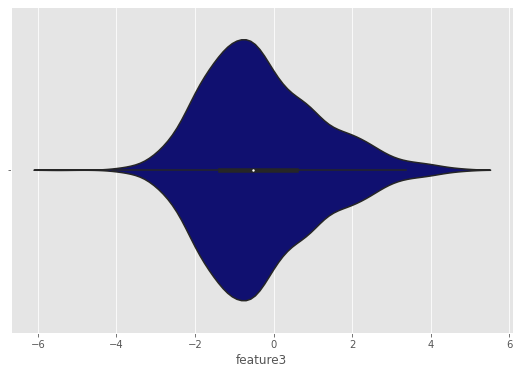

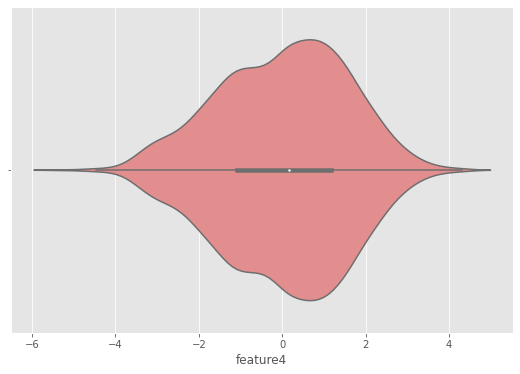

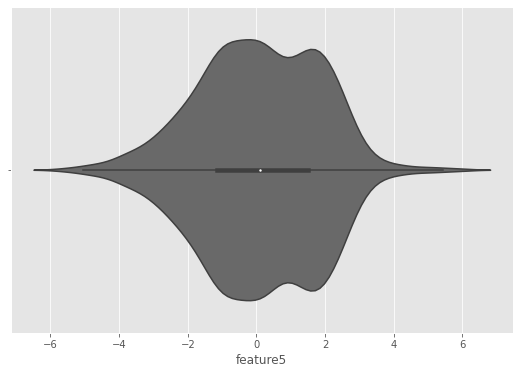

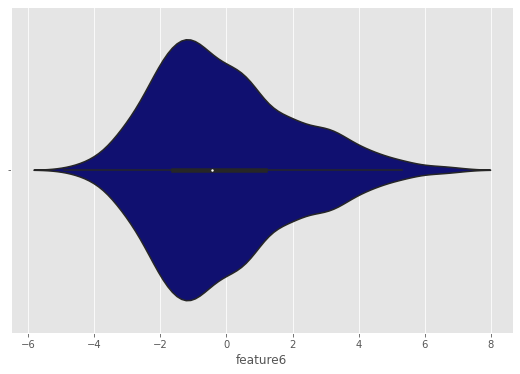

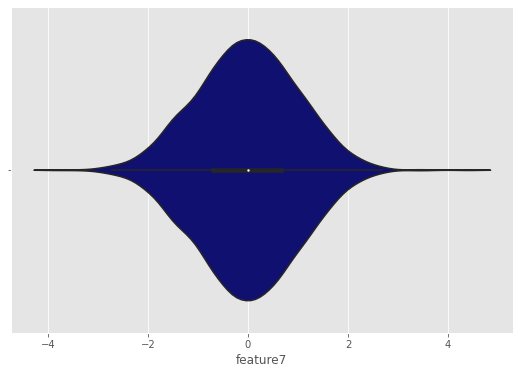

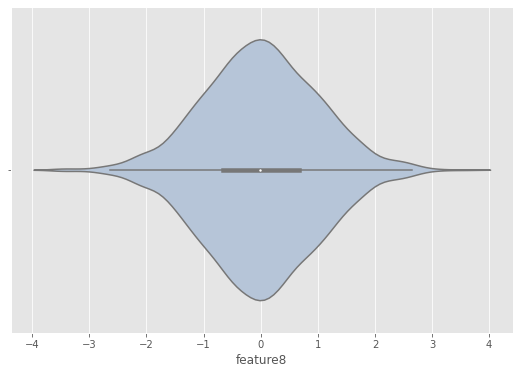

In [15]:
violinplots(train)

##### Random forest

In [16]:
y = train["target"]
x = train.drop("target",axis=1)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=34)

In [18]:
rfc = RandomForestClassifier()

In [19]:
param_grid = { 
    "n_estimators": [200, 500],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth" : [4, 6, 8, 10],
    "criterion" : ["gini", "entropy"],
    "bootstrap" : [True, False]
}

In [ ]:
%%time
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [20]:
rfc_2 = RandomForestClassifier(random_state=42, bootstrap=False, max_features='log2',
                               n_estimators=500, max_depth=10, criterion='gini',
                              min_samples_leaf=1, min_samples_split=2)

In [21]:
rfc_2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       n_estimators=500, random_state=42)

In [22]:
y_pred = rfc_2.predict(x_val)

##### Model evaluation

In [23]:
print("Accuracy for Random Forest on the validation data: ", round(accuracy_score(y_val, y_pred), 3))

Accuracy for Random Forest on the validation data:  0.933


<AxesSubplot:>

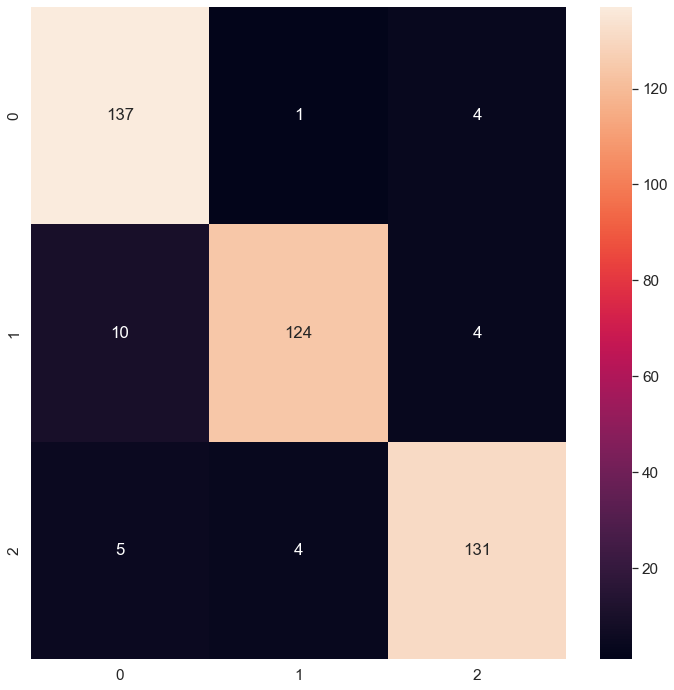

In [24]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True,
            fmt='g')

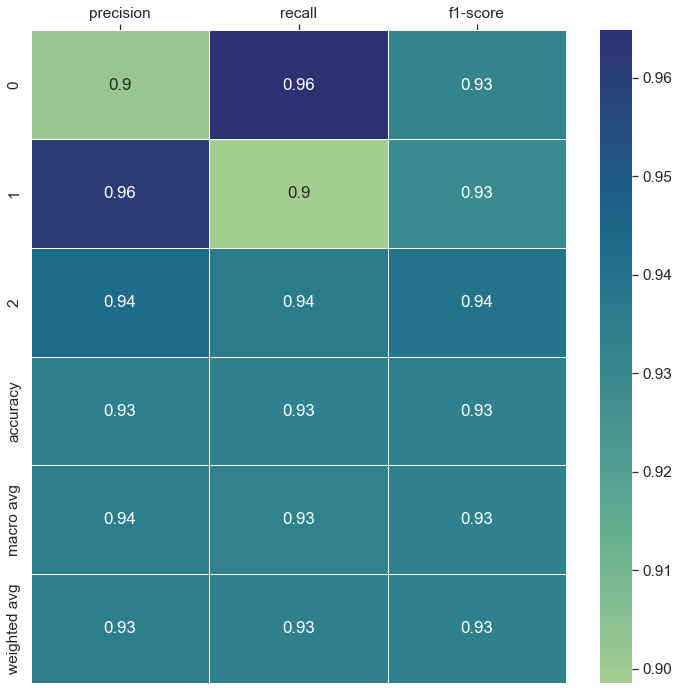

In [25]:
clf_report = classification_report(y_val,
                                   y_pred,
                                   target_names=[0, 1, 2],
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="crest",
           linewidth=.5)
ax.xaxis.tick_top()

##### Final predictions

In [26]:
y_final = rfc_2.predict(test)

In [27]:
final_results = pd.DataFrame(y_final).set_axis(["final_status"], axis=1)

In [28]:
final_results.to_csv("predictions.csv", index = False)

In [29]:
final_results.to_json("predictions.json")